##### Aprendizaje para determinar Estrellas

#### Ocupado el Notebook Regresión logistica 2b

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df2 = pd.read_csv("../datos/SDSS-DR14.csv")
df2.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [3]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
objid        10000 non-null float64
ra           10000 non-null float64
dec          10000 non-null float64
u            10000 non-null float64
g            10000 non-null float64
r            10000 non-null float64
i            10000 non-null float64
z            10000 non-null float64
run          10000 non-null int64
rerun        10000 non-null int64
camcol       10000 non-null int64
field        10000 non-null int64
specobjid    10000 non-null float64
class        10000 non-null object
redshift     10000 non-null float64
plate        10000 non-null int64
mjd          10000 non-null int64
fiberid      10000 non-null int64
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


Podemos determinar que gran cantidad de datos forman parte de un formato numérico, por lo que no presentará problemas en la comparación y representación de los mismos.

In [4]:
df2.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

Logramos ver ademas que basado en al dataset en su complejidad, no nos daría inconsistencias en cuanto al exceso de ruido que ésto pueda generar.

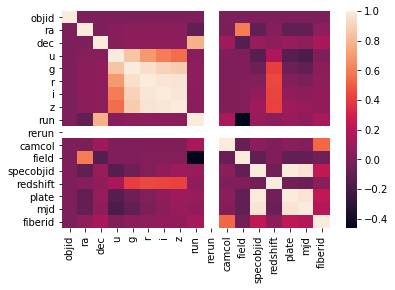

In [5]:
sb.heatmap(df2.corr())
df2_data = df2

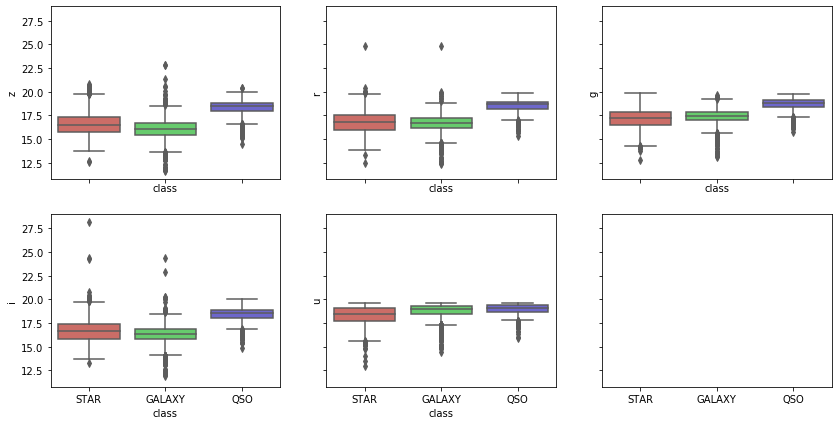

In [6]:
fig, axes = plt.subplots(2, 3,figsize=(14,7), sharex=True, sharey=True)
sb.boxplot(palette='hls', data=df2_data,x="class", y='z',ax=axes[0,0])
sb.boxplot(palette='hls', data=df2_data,x="class", y='r',ax=axes[0,1])
sb.boxplot(palette='hls', data=df2_data,x="class", y='g',ax=axes[0,2])
sb.boxplot(palette='hls', data=df2_data,x="class", y='i',ax=axes[1,0])
sb.boxplot(palette='hls', data=df2_data,x="class", y='u',ax=axes[1,1])

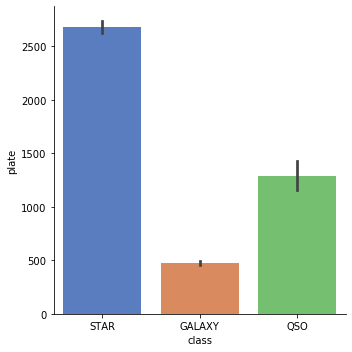

In [7]:
sb.catplot(palette='muted', kind='bar',data=df2_data,x="class", y='plate')

### Transformación de clases a variables numéricas

In [8]:
df2_data = df2_data[df2_data['class']!='QSO']
df2_class = df2_data[['class']]
df2_dum = pd.get_dummies(df2_class)

In [9]:
df2_dum.head()

,class_GALAXY,class_STAR
0,0,1
1,0,1
2,1,0
3,0,1
4,0,1


In [10]:
df2_star= df2_dum.drop(['class_GALAXY'],axis=1)

In [11]:
df2_full = df2_data.drop(['class'],axis=1)
df2_data = pd.concat([df2_star,df2_full],axis=1)

In [12]:
df2_data.head()

,class_STAR,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
0,1,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,-0.000009,3306,54922,491
1,1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,-0.000055,323,51615,541
2,0,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,0.123111,287,52023,513
3,1,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,-0.000111,3306,54922,510
4,1,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,0.000590,3306,54922,512


###  Revision del dataset

In [13]:
df2_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9150 entries, 0 to 9999
Data columns (total 18 columns):
class_STAR    9150 non-null uint8
objid         9150 non-null float64
ra            9150 non-null float64
dec           9150 non-null float64
u             9150 non-null float64
g             9150 non-null float64
r             9150 non-null float64
i             9150 non-null float64
z             9150 non-null float64
run           9150 non-null int64
rerun         9150 non-null int64
camcol        9150 non-null int64
field         9150 non-null int64
specobjid     9150 non-null float64
redshift      9150 non-null float64
plate         9150 non-null int64
mjd           9150 non-null int64
fiberid       9150 non-null int64
dtypes: float64(10), int64(7), uint8(1)
memory usage: 1.3 MB


In [14]:
df2_data.isnull().sum()

class_STAR    0
objid         0
ra            0
dec           0
u             0
g             0
r             0
i             0
z             0
run           0
rerun         0
camcol        0
field         0
specobjid     0
redshift      0
plate         0
mjd           0
fiberid       0
dtype: int64

In [15]:
df2_data.shape

(9150, 18)

### Proceso de entrenamiento y clasificación

In [16]:
X = df2_data.ix[:,1:df2_data.shape[1]].values
y = df2_data.ix[:,0].values

In [17]:
def sigmoid(X, weight):
    z = np.dot(X, weight)
    return 1 / (1 + np.exp(-z))

In [18]:
def loss(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

In [19]:
def gradient_descent(X, h, y):
    return np.dot(X.T, (h - y)) / y.shape[0]
def update_weight_loss(weight, learning_rate, gradient):
    return weight - learning_rate * gradient

In [20]:
def log_likelihood(x, y, weights):
    z = np.dot(x, weights)
    ll = np.sum( y*z - np.log(1 + np.exp(z)) )
    return ll

In [21]:
import time
start_time = time.time()

num_iter = 1000

intercept = np.ones((X.shape[0], 1)) 
X = np.concatenate((intercept, X), axis=1)
theta = np.zeros(X.shape[1])

for i in range(num_iter):
    h = sigmoid(X, theta)
    gradient = gradient_descent(X, h, y)
    theta = update_weight_loss(theta, 0.1, gradient)
    print(theta)

print("Training time (Log Reg using Gradient descent):" + str(time.time() - start_time) + " seconds")
print("Learning rate: {}\nIteration: {}".format(0.1, num_iter))

[-4.62295082e-03 -5.72159508e+15 -9.18985268e-01 -1.45924706e-01
 -9.76836222e-02 -8.51931499e-02 -7.50960704e-02 -6.79389102e-02
 -6.24064013e-02 -5.64745355e+00 -1.39150820e+00 -1.74043716e-02
 -1.33260656e+00  5.37873215e+16 -2.19281827e-03  4.77729945e+01
 -1.93713120e+02 -1.05660656e+00]
[-5.92459016e-02 -7.33256902e+16 -1.06054682e+01 -1.00702120e+00
 -1.12483208e+00 -1.03291312e+00 -9.84541205e-01 -9.56805617e-01
 -9.37352612e-01 -6.00907869e+01 -1.78330164e+01 -2.17032787e-01
 -1.77721257e+01  2.44048640e+16 -6.58042132e-03  2.16806667e+01
 -3.03576060e+03 -1.96343552e+01]
[-2.52459016e-02 -3.12455902e+16 -4.70315618e+00 -6.22551443e-01
 -5.04997270e-01 -4.54855008e-01 -4.20146758e-01 -3.97118028e-01
 -3.79656445e-01 -2.87265683e+01 -7.59901639e+00 -9.50655738e-02
 -7.03046448e+00  9.52225455e+16 -6.67130950e-03  8.45767869e+01
 -1.21649638e+03 -8.92955738e+00]
[-3.70273224e-02 -4.58268656e+16 -6.20560452e+00 -1.39662213e+00
 -7.29308317e-01 -6.59040920e-01 -6.12934047e-01 -5.8

[-3.93770492e-02 -4.87350049e+16 -3.50234909e+00 -1.12548966e+01
 -9.91623330e-01 -7.34173864e-01 -4.85427560e-01 -3.09941790e-01
 -1.79640492e-01 -1.36967191e+02 -1.18524918e+01 -2.62967213e-01
  1.27067213e+00  9.24623957e+16 -5.29364970e-02  8.21290929e+01
 -1.95486810e+03 -2.46612514e+01]
[-3.46120219e-02 -4.28375689e+16 -2.66692716e+00 -1.14808038e+01
 -9.05955175e-01 -6.51605955e-01 -4.02063355e-01 -2.25487588e-01
 -9.42643415e-02 -1.34732055e+02 -1.04182186e+01 -2.48191257e-01
  2.55271585e+00  8.60966198e+16 -5.34282380e-02  7.64749071e+01
 -1.71496192e+03 -2.36764973e+01]
[-2.98469945e-02 -3.69401328e+16 -1.83150523e+00 -1.17067109e+01
 -8.20287020e-01 -5.69038045e-01 -3.18699150e-01 -1.41033387e-01
 -8.88819060e-03 -1.32496918e+02 -8.98394536e+00 -2.33415301e-01
  3.83475956e+00  7.97308440e+16 -5.39199791e-02  7.08207213e+01
 -1.47505573e+03 -2.26917432e+01]
[-2.54098361e-02 -3.14484836e+16 -1.06325873e+00 -1.19329726e+01
 -7.40850605e-01 -4.92264697e-01 -2.40936455e-01 -6.2

[-1.96830601e-02 -2.43607393e+16  9.96067067e-01 -2.27149870e+01
 -8.66651959e-01 -4.46651992e-01  6.36374863e-04  3.23045498e-01
  5.63625365e-01 -2.26036361e+02 -5.92460109e+00 -3.44672131e-01
  1.45624426e+01  1.18393126e+17 -9.94370849e-02  1.05162710e+02
 -9.01541317e+02 -3.50375902e+01]
[-7.43060109e-02 -9.19648344e+16 -8.69041583e+00 -2.35760835e+01
 -1.89380042e+00 -1.39437196e+00 -9.08808760e-01 -5.65821209e-01
 -3.11320846e-01 -2.80479694e+02 -2.23661093e+01 -5.44300546e-01
 -1.87707650e+00  8.90106688e+16 -1.03824688e-01  7.90703825e+01
 -3.74358879e+03 -5.36153388e+01]
[-6.43715847e-02 -7.96694918e+16 -6.77981278e+00 -2.35051073e+01
 -1.71150626e+00 -1.22212612e+00 -7.38824909e-01 -3.96297850e-01
 -1.41971943e-01 -2.71439016e+02 -1.93758470e+01 -5.06825137e-01
  1.67146995e+00  8.64117819e+16 -1.03964564e-01  7.67613115e+01
 -3.23319436e+03 -5.03583115e+01]
[-5.44371585e-02 -6.73741492e+16 -4.86920973e+00 -2.34341310e+01
 -1.52921210e+00 -1.04988027e+00 -5.68841057e-01 -2.2

[-4.39344262e-02 -5.43754426e+16  4.19670776e-01 -3.36471222e+01
 -1.55783442e+00 -9.01644526e-01 -2.18133136e-01  2.70931003e-01
  6.34343207e-01 -3.45593989e+02 -1.32242623e+01 -5.33120219e-01
  2.06305956e+01  8.46631979e+16 -1.49464918e-01  7.52093880e+01
 -2.18779041e+03 -5.51181148e+01]
[-3.49726776e-02 -4.32839344e+16  2.15651108e+00 -3.36232050e+01
 -1.39354806e+00 -7.46207422e-01 -6.45113248e-02  4.24294548e-01
  7.87699049e-01 -3.37743158e+02 -1.05267760e+01 -4.99218579e-01
  2.38183005e+01  8.11751733e+16 -1.49655718e-01  7.21107104e+01
 -1.72833208e+03 -5.22973388e+01]
[-3.02076503e-02 -3.73864984e+16  2.99193301e+00 -3.38491121e+01
 -1.30787991e+00 -6.63639513e-01  1.88528799e-02  5.08748750e-01
  8.73075199e-01 -3.35508022e+02 -9.09250273e+00 -4.84442623e-01
  2.51003443e+01  7.48093974e+16 -1.50147459e-01  6.64565246e+01
 -1.48842590e+03 -5.13125847e+01]
[-2.54426230e-02 -3.14890623e+16  3.82735494e+00 -3.40750192e+01
 -1.22221175e+00 -5.81071603e-01  1.02217085e-01  5.9

[-2.15956284e-02 -2.67278295e+16  6.65593974e+00 -4.76807480e+01
 -1.42027859e+00 -5.72193477e-01  3.43679172e-01  1.00398949e+00
  1.49562861e+00 -4.56559137e+02 -6.50028415e+00 -6.29732240e-01
  3.84888251e+01  6.10612715e+16 -2.03466148e-01  5.42494098e+01
 -1.04847720e+03 -6.65124973e+01]
[-2.15628415e-02 -2.66872508e+16  6.62268698e+00 -4.81087214e+01
 -1.42355451e+00 -5.72017224e-01  3.47589438e-01  1.01059934e+00
  1.50414493e+00 -4.59927246e+02 -6.49041530e+00 -6.38398907e-01
  3.84683989e+01  5.20321407e+16 -2.04324428e-01  4.62300437e+01
 -1.05478595e+03 -6.69769344e+01]
[-1.67978142e-02 -2.07898148e+16  7.45810890e+00 -4.83346285e+01
 -1.33788636e+00 -4.89449314e-01  4.30953642e-01  1.09505354e+00
  1.58952108e+00 -4.57692109e+02 -5.05614208e+00 -6.23622951e-01
  3.97504426e+01  4.56663648e+16 -2.04816169e-01  4.05758579e+01
 -8.14879765e+02 -6.59921803e+01]
[-1.36612022e-02 -1.69077869e+16  8.02403060e+00 -4.85623574e+01
 -1.28274936e+00 -4.35139400e-01  4.87085799e-01  1.1

[-1.14426230e-02 -1.41619623e+16  1.01862568e+01 -6.39592357e+01
 -1.54404858e+00 -4.47696174e-01  7.49404640e-01  1.61372921e+00
  2.25700738e+00 -5.92620557e+02 -3.44422951e+00 -8.02213115e-01
  4.99721585e+01  3.53128696e+16 -2.66873812e-01  3.13843716e+01
 -5.61442137e+02 -8.36292295e+01]
[-1.72896175e-02 -2.13984951e+16  9.39413968e+00 -6.46089168e+01
 -1.65734966e+00 -5.49167700e-01  6.55557928e-01  1.52463188e+00
  2.17121537e+00 -6.03533038e+02 -5.20417486e+00 -8.35546448e-01
  4.90108033e+01  2.32850923e+16 -2.68130055e-01  2.07022077e+01
 -8.72984377e+02 -8.62851093e+01]
[-7.35519126e-03 -9.10315246e+15  1.13047427e+01 -6.45379406e+01
 -1.47505550e+00 -3.76921854e-01  8.25541780e-01  1.69415524e+00
  2.34056427e+00 -5.94492361e+02 -2.21391257e+00 -7.98071038e-01
  5.25593497e+01  2.06862055e+16 -2.68269931e-01  1.83931366e+01
 -3.62589940e+02 -8.30280820e+01]
[-7.32240437e-03 -9.06257377e+15  1.12714900e+01 -6.49659140e+01
 -1.47833143e+00 -3.76745601e-01  8.29452045e-01  1.7

[-2.00655738e-02 -2.48341574e+16  1.30672772e+01 -7.98622380e+01
 -2.02178298e+00 -6.48833015e-01  8.43779568e-01  1.92009752e+00
  2.72070184e+00 -7.42452557e+02 -6.03973770e+00 -1.02803825e+00
  6.21172404e+01  2.04401780e+16 -3.31923716e-01  1.81797049e+01
 -1.02957670e+03 -1.04022967e+02]
[-1.00983607e-02 -1.24982361e+16  1.49819731e+01 -7.97912312e+01
 -1.83885613e+00 -4.75990548e-01  1.01434915e+00  2.09020274e+00
  2.89063040e+00 -7.33381432e+02 -3.03960656e+00 -9.90377049e-01
  6.56677869e+01  1.78837728e+16 -3.32063580e-01  1.59083607e+01
 -5.17443590e+02 -1.00747656e+02]
[-1.13661202e-03 -1.40672787e+15  1.67188134e+01 -7.97673140e+01
 -1.67456977e+00 -3.20553444e-01  1.16797096e+00  2.24356629e+00
  3.04398624e+00 -7.25530601e+02 -3.42120219e-01 -9.56475410e-01
  6.88554918e+01  1.43957482e+16 -3.32254380e-01  1.28096831e+01
 -5.79852623e+01 -9.79268798e+01]
[-5.57595628e-02 -6.90108230e+16  7.03233051e+00 -8.06284105e+01
 -2.70171822e+00 -1.26827341e+00  2.58525828e-01  1.3

[-6.21311475e-02 -7.68966148e+16  7.81995266e+00 -8.99591164e+01
 -3.03006451e+00 -1.42389107e+00  2.88195843e-01  1.51870654e+00
  2.43307925e+00 -8.74826929e+02 -1.87014754e+01 -1.29285792e+00
  6.07308689e+01  8.72517010e+16 -3.78173238e-01  7.75264809e+01
 -3.13506874e+03 -1.29620104e+02]
[-5.22513661e-02 -6.46689033e+16  9.71631918e+00 -8.98895802e+01
 -2.84874637e+00 -1.25255910e+00  4.57280962e-01  1.68733854e+00
  2.60153967e+00 -8.65859749e+02 -1.57276612e+01 -1.25543716e+00
  6.42376667e+01  8.45925811e+16 -3.78314221e-01  7.51639126e+01
 -2.62753916e+03 -1.26364694e+02]
[-4.25464481e-02 -5.26576115e+16  1.15725043e+01 -8.98199114e+01
 -2.67064653e+00 -1.08421967e+00  6.23442375e-01  1.85307562e+00
  2.76712227e+00 -8.57024066e+02 -1.28064809e+01 -1.21836612e+00
  6.76437432e+01  8.17516095e+16 -3.78459148e-01  7.26398470e+01
 -2.12917411e+03 -1.23190191e+02]
[-3.35846995e-02 -4.15661033e+16  1.33093446e+01 -8.97959942e+01
 -2.50636017e+00 -9.28782565e-01  7.77064186e-01  2.0

[-3.25901639e-02 -4.03352164e+16  1.69920495e+01 -1.05595969e+02
 -2.78395068e+00 -9.58276281e-01  1.01980194e+00  2.44577067e+00
  3.50561498e+00 -9.92718142e+02 -9.80963934e+00 -1.37981967e+00
  8.49463333e+01  7.36794315e+16 -4.39066331e-01  6.54738470e+01
 -1.63131521e+03 -1.37829514e+02]
[-2.67213115e-02 -3.30716311e+16  1.80242967e+01 -1.05750385e+02
 -2.67761226e+00 -8.56553181e-01  1.12161554e+00  2.54829900e+00
  3.60881982e+00 -9.89045825e+02 -8.04311475e+00 -1.36120765e+00
  8.66229344e+01  6.80570838e+16 -4.39482425e-01  6.04798470e+01
 -1.33373772e+03 -1.36389907e+02]
[-2.20109290e-02 -2.72418262e+16  1.88474843e+01 -1.05976322e+02
 -2.59299596e+00 -7.74981600e-01  1.20399767e+00  2.63177659e+00
  3.69322289e+00 -9.86851781e+02 -6.62528962e+00 -1.34670492e+00
  8.78756557e+01  6.16582062e+16 -4.39981366e-01  5.47962623e+01
 -1.09667418e+03 -1.35410770e+02]
[-2.19672131e-02 -2.71877213e+16  1.88157680e+01 -1.06403663e+02
 -2.59606035e+00 -7.74604896e-01  1.20810415e+00  2.6

[-8.68852459e-03 -1.07533525e+16  2.54787017e+01 -1.20808943e+02
 -2.64320224e+00 -5.91688611e-01  1.65475642e+00  3.27708743e+00
  4.48298196e+00 -1.11093227e+03 -2.61524590e+00 -1.47321858e+00
  1.07986486e+02  2.21007162e+16 -5.00225521e-01  1.96654973e+01
 -4.46085918e+02 -1.49270137e+02]
[-3.97814208e-03 -4.92354754e+15  2.63018893e+01 -1.21034880e+02
 -2.55858594e+00 -5.10117030e-01  1.73713855e+00  3.36056501e+00
  4.56738503e+00 -1.10873823e+03 -1.19742077e+00 -1.45871585e+00
  1.09239208e+02  1.57018385e+16 -5.00724462e-01  1.39819126e+01
 -2.09022377e+02 -1.48291000e+02]
[-2.04043716e-02 -2.52534705e+16  2.36429792e+01 -1.21910733e+02
 -2.86982884e+00 -7.94946456e-01  1.46648196e+00  3.09804345e+00
  4.31038544e+00 -1.13047448e+03 -6.14171585e+00 -1.52423497e+00
  1.04983820e+02 -8.93763525e+14 -5.02566893e-01 -7.56502732e-01
 -1.06874304e+03 -1.54189896e+02]
[ 2.49726776e-02  3.09074344e+16  3.14914916e+01 -1.21341485e+02
 -2.03804763e+00 -1.76127857e-02  2.22573495e+00  3.8

[-1.27650273e-02 -1.57986361e+16  2.89962393e+01 -1.37625602e+02
 -3.04158349e+00 -7.19474658e-01  1.82077337e+00  3.65500134e+00
  5.01842633e+00 -1.26641268e+03 -3.84227322e+00 -1.69065027e+00
  1.21166672e+02  3.63862870e+16 -5.65382365e-01  3.23583607e+01
 -6.48677863e+02 -1.68805721e+02]
[-1.28415301e-02 -1.58933197e+16  2.89468713e+01 -1.38053645e+02
 -3.04692325e+00 -7.21231425e-01  1.82279887e+00  3.65975178e+00
  5.02510123e+00 -1.26986869e+03 -3.86530055e+00 -1.69984153e+00
  1.21123503e+02  2.72980397e+16 -5.66246438e-01  2.42864918e+01
 -6.60664934e+02 -1.69283426e+02]
[-3.87978142e-03 -4.80181148e+15  3.06837116e+01 -1.38029728e+02
 -2.88263689e+00 -5.65794322e-01  1.97642068e+00  3.81311532e+00
  5.17845707e+00 -1.26201786e+03 -1.16781421e+00 -1.66593989e+00
  1.24311208e+02  2.38100151e+16 -5.66437238e-01  2.11878142e+01
 -2.01206607e+02 -1.66462650e+02]
[-5.85027322e-02 -7.24059066e+16  2.09972287e+01 -1.38890825e+02
 -3.90978534e+00 -1.51351429e+00  1.06697554e+00  2.9

[-1.56830601e-02 -1.94101393e+16  3.02966247e+01 -1.54154717e+02
 -3.43137216e+00 -8.30745304e-01  2.01332093e+00  4.06654554e+00
  5.59315685e+00 -1.41789628e+03 -4.72060109e+00 -1.89408197e+00
  1.30001197e+02  4.70021707e+16 -6.33245357e-01  4.17922732e+01
 -8.00278421e+02 -1.89930486e+02]
[-1.72568306e-02 -2.13579164e+16  3.00678641e+01 -1.54581870e+02
 -3.46473339e+00 -8.58448946e-01  1.99033461e+00  4.04682093e+00
  5.57569325e+00 -1.42307302e+03 -5.19430601e+00 -1.91138251e+00
  1.29765634e+02  3.71220432e+16 -6.34205700e-01  3.30172131e+01
 -8.90101328e+02 -1.90980082e+02]
[-8.29508197e-03 -1.02664082e+16  3.18047044e+01 -1.54557953e+02
 -3.30044703e+00 -7.03011842e-01  2.14395642e+00  4.20018448e+00
  5.72904909e+00 -1.41522219e+03 -2.49681967e+00 -1.87748087e+00
  1.32953339e+02  3.36340186e+16 -6.34396500e-01  2.99185355e+01
 -4.30643000e+02 -1.88159306e+02]
[-2.80874317e-02 -3.47624098e+16  2.84000921e+01 -1.55431072e+02
 -3.67462582e+00 -1.04621825e+00  1.81693523e+00  3.8

[-2.33114754e-02 -2.88514475e+16  3.32457096e+01 -1.72081020e+02
 -3.93035939e+00 -1.02799015e+00  2.14157407e+00  4.42954944e+00
  6.13056727e+00 -1.58868201e+03 -7.01675410e+00 -2.12345902e+00
  1.45544770e+02  5.58182542e+16 -7.05337185e-01  4.96279344e+01
 -1.18071314e+03 -2.12268836e+02]
[-1.85464481e-02 -2.29540115e+16  3.40811315e+01 -1.72306927e+02
 -3.84469124e+00 -9.45422239e-01  2.22493828e+00  4.51400364e+00
  6.21594342e+00 -1.58644687e+03 -5.58248087e+00 -2.10868306e+00
  1.46826814e+02  4.94524783e+16 -7.05828927e-01  4.39737486e+01
 -9.40806956e+02 -2.11284082e+02]
[-1.41092896e-02 -1.74623623e+16  3.48493780e+01 -1.72533188e+02
 -3.76525482e+00 -8.68648891e-01  2.30270097e+00  4.59295135e+00
  6.29587098e+00 -1.58462227e+03 -4.24689617e+00 -2.09581967e+00
  1.48063536e+02  4.28916204e+16 -7.06349865e-01  3.81463060e+01
 -7.18015590e+02 -2.10343689e+02]
[-1.72349727e-02 -2.13308639e+16  3.44064034e+01 -1.73047495e+02
 -3.82775208e+00 -9.23242940e-01  2.25386855e+00  4.5

[-4.09617486e-02 -5.06963082e+16  3.51971214e+01 -1.90490818e+02
 -4.60350169e+00 -1.38984582e+00  2.10500782e+00  4.62578740e+00
  6.49952212e+00 -1.76889408e+03 -1.23294863e+01 -2.41075956e+00
  1.57662333e+02  9.18948372e+16 -7.76454658e-01  8.16762295e+01
 -2.07326971e+03 -2.36425306e+02]
[-3.44480874e-02 -4.26346754e+16  3.63640413e+01 -1.90604181e+02
 -4.48497956e+00 -1.27683802e+00  2.21767213e+00  4.73894755e+00
  6.61320925e+00 -1.76435496e+03 -1.03688743e+01 -2.38894536e+00
  1.59617197e+02  8.67115173e+16 -7.76815063e-01  7.70720874e+01
 -1.74202150e+03 -2.34670104e+02]
[-2.96830601e-02 -3.67372393e+16  3.71994632e+01 -1.90830088e+02
 -4.39931141e+00 -1.19427011e+00  2.30103633e+00  4.82340176e+00
  6.69858540e+00 -1.76211983e+03 -8.93460109e+00 -2.37416940e+00
  1.60899240e+02  8.03457414e+16 -7.77306804e-01  7.14179016e+01
 -1.50211532e+03 -2.33685350e+02]
[-2.58688525e-02 -3.20165852e+16  3.78683791e+01 -1.91057085e+02
 -4.33150763e+00 -1.12822293e+00  2.36849026e+00  4.8

[-8.40437158e-03 -1.04016705e+16  4.45438125e+01 -2.05814542e+02
 -4.29906571e+00 -8.81289428e-01  2.86787185e+00  5.57661315e+00
  7.59072529e+00 -1.88134356e+03 -2.52971585e+00 -2.49325137e+00
  1.81864967e+02  3.39971155e+16 -8.35591576e-01  3.02551148e+01
 -4.33053186e+02 -2.46385448e+02]
[-2.81748634e-02 -3.48706197e+16  4.11433620e+01 -2.06687696e+02
 -4.67283447e+00 -1.22410939e+00  2.54122885e+00  5.25911996e+00
  7.27939229e+00 -1.90611086e+03 -8.48063388e+00 -2.57146995e+00
  1.76073787e+02  1.61170099e+16 -8.37620295e-01  1.43761311e+01
 -1.46582197e+03 -2.53512869e+02]
[-1.56502732e-02 -1.93695607e+16  4.33353203e+01 -2.06554229e+02
 -4.44371321e+00 -1.00854795e+00  2.75326857e+00  5.47023256e+00
  7.49014421e+00 -1.89409744e+03 -4.71073224e+00 -2.52395082e+00
  1.80190257e+02  1.94878212e+16 -8.37760041e-01  1.73690273e+01
 -8.16602169e+02 -2.49480891e+02]
[-5.71584699e-03 -7.07421803e+15  4.52459234e+01 -2.06483253e+02
 -4.26141905e+00 -8.36302105e-01  2.92325242e+00  5.6

[-3.77049180e-03 -4.66654918e+15  4.88902110e+01 -2.17065912e+02
 -4.45201474e+00 -8.38234707e-01  3.12939634e+00  5.99599933e+00
  8.12723954e+00 -1.97930087e+03 -1.13491803e+00 -2.59942623e+00
  1.96181645e+02  1.53035854e+16 -8.84039272e-01  1.36546995e+01
 -2.15078792e+02 -2.57881492e+02]
[-2.35628415e-02 -2.91625508e+16  4.54855987e+01 -2.17939031e+02
 -4.82619353e+00 -1.18144111e+00  2.80237515e+00  5.67813075e+00
  7.81553228e+00 -2.00409409e+03 -7.09241530e+00 -2.67776503e+00
  1.90386191e+02 -2.58479123e+15 -8.86067998e-01 -2.23162842e+00
 -1.24898417e+03 -2.65016301e+02]
[ 2.18142077e-02  2.69983541e+16  5.33341111e+01 -2.17369784e+02
 -3.99441232e+00 -4.04107439e-01  3.56162814e+00  6.43111964e+00
  8.56566569e+00 -1.96094566e+03  6.56607650e+00 -2.51294536e+00
  2.04160497e+02  1.34372309e+17 -8.86066032e-01  1.19406689e+02
  1.20563707e+03 -2.48551765e+02]
[-3.28087432e-02 -4.06057410e+16  4.36476282e+01 -2.18230880e+02
 -5.02156078e+00 -1.35182741e+00  2.65218301e+00  5.5

[ 2.48087432e-03  3.07045410e+15  5.39911160e+01 -2.31007056e+02
 -4.60628465e+00 -7.82915891e-01  3.42123069e+00  6.45990521e+00
  8.71931378e+00 -2.10396302e+03  7.46743169e-01 -2.75253005e+00
  2.14038454e+02  8.86781711e+15 -9.37274292e-01  7.94200000e+00
  1.11333230e+02 -2.71999754e+02]
[-5.21420765e-02 -6.45336410e+16  4.43046331e+01 -2.31868153e+02
 -5.63343310e+00 -1.73063586e+00  2.51178555e+00  5.57103851e+00
  7.84436757e+00 -2.15840635e+03 -1.56947650e+01 -2.95215847e+00
  1.97598934e+02 -2.05146404e+16 -9.41661895e-01 -1.81503279e+01
 -2.73071425e+03 -2.90577503e+02]
[-6.76502732e-03 -8.37273607e+15  5.21531454e+01 -2.31298905e+02
 -4.80165189e+00 -9.53302190e-01  3.27103855e+00  6.32402739e+00
  8.59450098e+00 -2.11525792e+03 -2.03627322e+00 -2.78733880e+00
  2.11373240e+02  1.16442460e+17 -9.41659928e-01  1.03487989e+02
 -2.76093011e+02 -2.74112967e+02]
[-6.13879781e-02 -7.59768311e+16  4.24666625e+01 -2.32160002e+02
 -5.82880035e+00 -1.90102216e+00  2.36159341e+00  5.4

In [22]:
result = sigmoid(X, theta)

In [23]:
print(result)

[1. 0. 0. ... 1. 0. 0.]


In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix = confusion_matrix(y, result)
print(confusion_matrix)
print(classification_report(y, result))

[[4857  141]
 [1029 3123]]
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      4998
           1       0.96      0.75      0.84      4152

    accuracy                           0.87      9150
   macro avg       0.89      0.86      0.87      9150
weighted avg       0.88      0.87      0.87      9150



## Usando algoritmo de aprendizaje a través de Scikit-Learn en la obtención de resultados

In [25]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)
print(X_test)

[[1.00000000e+00 1.23765000e+18 1.62862718e+02 ... 2.76000000e+02
  5.19090000e+04 4.13000000e+02]
 [1.00000000e+00 1.23765000e+18 1.84085331e+02 ... 3.30600000e+03
  5.49220000e+04 5.47000000e+02]
 [1.00000000e+00 1.23765000e+18 1.89643225e+02 ... 4.94000000e+02
  5.19150000e+04 5.22000000e+02]
 ...
 [1.00000000e+00 1.23765000e+18 2.55912629e+02 ... 3.51000000e+02
  5.16950000e+04 1.36000000e+02]
 [1.00000000e+00 1.23765000e+18 1.08958395e+01 ... 4.18000000e+02
  5.18170000e+04 3.00000000e+01]
 [1.00000000e+00 1.23765000e+18 1.28488845e+02 ... 2.33100000e+03
  5.37420000e+04 4.33000000e+02]]


In [27]:
#Aprendizaje
LogReg = LogisticRegression(max_iter=1000,penalty='l1',solver='liblinear')
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
#Predicciones
y_pred = LogReg.predict(X_test)
y_pred

array([1, 1, 0, ..., 0, 0, 1], dtype=uint8)

In [29]:
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[1482,   16],
       [   0, 1247]])

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1498
           1       0.99      1.00      0.99      1247

    accuracy                           0.99      2745
   macro avg       0.99      0.99      0.99      2745
weighted avg       0.99      0.99      0.99      2745

